importing libraries

## 1 Importando librerías 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


reading dataframe and checking data types

### 1.1 Leyendo dataframe y verificando tipos de datos

In [3]:
df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2 Preparando datos

### 2.1 Renombrando columnas a snake_case

In [5]:
df.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release',
                   'Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales',
                   'Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'},inplace=True)

df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2 Verificando columnas con valores NaN

In [6]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
df[df['platform'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [8]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df[df['critic_score'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### 2.2.1 Decidimos rellenar los valores NaN de la columna 'year_of_release' con el valor 2999 (fecha inexistente) para poder trabajar con los datos

In [12]:
df['year_of_release'].fillna(2999,inplace=True)

In [13]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### 2.2.2 Decidimos eliminar los dos registros que no cuentan con el campo "name" y pertenecen a la plataforma "GEN"debido a que no nos sirven para nuestro estudio, al igual que representan una cantidad muy pequeña de datos que no generará resultados tendenciosos

In [14]:
df=df[~df['name'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [15]:
#Revisando valores tbd
#df[df.isin(['tbd']).any(axis=1)]

### 2.2.3 Decidimos rellenar los valores NaN de la columna 'rating' con el valor 'UN' (Undetermined), no sería inteligente eliminarlos debido a que son representativos para el estudio.

In [16]:
df['rating'].fillna('UN',inplace=True)
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 2.2.4 Decidimos rellenar los valores NaN de la columna 'critic_score' con el valor numérico 105, esto debido a que es un valor fuera de rango (0-100) y de esta manera podemos filtrarlo para omitirlos en caso de ser necesario, sin perder la posibilidad de analizar el resto de su información, que puede ser representativa para el estudio.

In [17]:
df['critic_score'].fillna(105,inplace=True)
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 2.2.4 Decidimos rellenar los valores NaN de la columna 'user_score' con el valor numérico 11, esto debido a que es un valor fuera de rango (0-10) y de esta manera podemos filtrarlo para omitirlos en caso de ser necesario, sin perder la posibilidad de analizar el resto de su información, que puede ser representativa para el estudio.

In [18]:
df['user_score'].fillna(11,inplace=True)
df[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 2.3 Verificando que no tengamos ningún valor NaN restante en el DataFrame, así como la información del mismo

In [19]:
df.isna().any()

name               False
platform           False
year_of_release    False
genre              False
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score       False
user_score         False
rating             False
dtype: bool

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### 2.3.1 Cambiando el tipo de dato de la columna 'year_of_release' de tipo  flotante (float64) por  entero (int)

In [21]:
df['year_of_release']= df['year_of_release'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


### 2.4 Verificando valores 'To Be Determined' en columna 'user_score'

##### 2.4.1 Verificando a que años pertenecen los videojuegos con calificación 'To Be Determined'

In [23]:
#Revisando valores tbd
df_tbd =df[df.isin(['tbd']).any(axis=1)]
df_tbd.groupby('year_of_release')['user_score'].count()

year_of_release
1997      1
1999      8
2000     43
2001     82
2002    192
2003     95
2004    107
2005    121
2006    124
2007    192
2008    326
2009    405
2010    331
2011    217
2012     24
2013     15
2014     21
2015     38
2016     34
2999     48
Name: user_score, dtype: int64

#####  Los valores To be determined en la columna 'user_score' indican que el videojuego no ha recibido sufucientes reseñas por parte de los usuarios para calcular una calificiación promedio, por lo tanto los mantendremos con ese valor

### 2.5 Calculando las ventas totales para cada juego

In [24]:
#df[df['name']=='Wii Sports']
df ['total_sales']= df['na_sales'] + df['eu_sales'] +df['jp_sales'] + df['other_sales']
df


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,105.0,11,UN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,105.0,11,UN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,105.0,11,UN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,105.0,11,UN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,105.0,11,UN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,105.0,11,UN,0.01


## 3 Analizando los datos

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,105.0,11,UN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,105.0,11,UN,31.38


### 3.1 ¿Cuántos juegos fueron lazados en diferentes años?

In [26]:
game_years_df= df.groupby('year_of_release')['name'].count().reset_index()
game_years_serie= df.groupby('year_of_release')['name'].count()


game_years_df.drop(game_years_df.loc[game_years_df['year_of_release']==2999].index)
game_years_df.rename(columns={'name':'games_released'},inplace=True)
game_years_df.head()

,year_of_release,games_released
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


Text(0, 0.5, 'Games released')

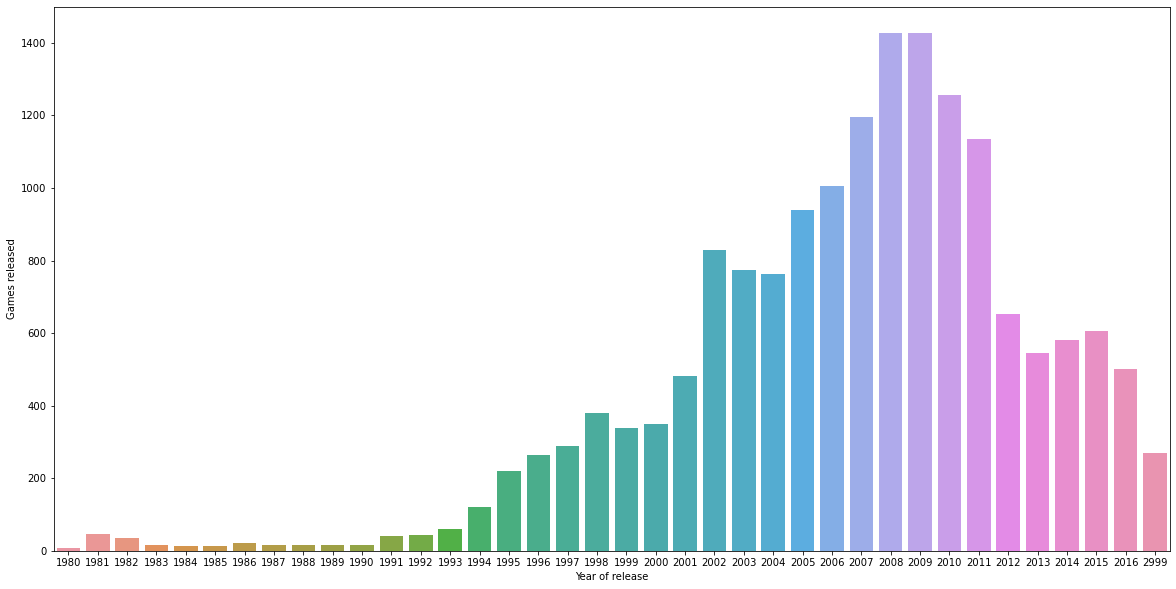

In [27]:
#game_years_df.plot(kind='bar', x='year_of_release', y='name')
plt.figure(figsize=(20,10))
sns.barplot(x='year_of_release',y='games_released',data=game_years_df)
plt.xlabel('Year of release')
plt.ylabel('Games released')
#sns.set_theme(rc={'figure.figsize':(10,7)})

In [28]:
max=game_years_serie.idxmax()
min=game_years_serie.idxmin()
print(f"el año con menor cantidad de juegos lanzados fue {game_years_df.loc[game_years_df['year_of_release']==min]['year_of_release'].values[0]}, la cantidad de juegos lanzados en ese año fue {game_years_df.loc[game_years_df['year_of_release']==min]['games_released'].values[0]} juegos")
print()
print(f"el año con menor cantidad de juegos lanzados fue {game_years_df.loc[game_years_df['year_of_release']==max]['year_of_release'].values[0]}, la cantidad de juegos lanzados en ese año fue {game_years_df.loc[game_years_df['year_of_release']==max]['games_released'].values[0]} juegos")

el año con menor cantidad de juegos lanzados fue 1980, la cantidad de juegos lanzados en ese año fue 9 juegos

el año con menor cantidad de juegos lanzados fue 2008, la cantidad de juegos lanzados en ese año fue 1427 juegos


In [29]:
df_1980=df[df['year_of_release']==1980]
df_1980.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
262,Asteroids,2600,1980,Shooter,4.00,0.26,0.0,0.05,105.0,11,UN,4.31
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.0,0.03,105.0,11,UN,2.76
1764,Kaboom!,2600,1980,Misc,1.07,0.07,0.0,0.01,105.0,11,UN,1.15
1968,Defender,2600,1980,Misc,0.99,0.05,0.0,0.01,105.0,11,UN,1.05
2650,Boxing,2600,1980,Fighting,0.72,0.04,0.0,0.01,105.0,11,UN,0.77


In [30]:
print("la cantidad de plataformas que existían en el 2008 eran: ",len(df_1980.platform.unique()))
print(f"Las ventas totales del videojuego más popular en 2008 fueron: { round(df_1980['total_sales'].max(), 2) } Millones de dólares")

la cantidad de plataformas que existían en el 2008 eran:  1
Las ventas totales del videojuego más popular en 2008 fueron: 4.31 Millones de dólares


In [31]:
df_2008=df[df['year_of_release']==2008]
df_2008.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
39,Super Smash Bros. Brawl,Wii,2008,Fighting,6.62,2.55,2.66,1.01,93.0,8.9,T,12.84
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M,10.50
90,Pokémon Platinum Version,DS,2008,Role-Playing,2.76,1.72,2.69,0.54,83.0,8.5,E,7.71


In [32]:
print("la cantidad de plataformas que existían en el 2008 eran: ",len(df_2008.platform.unique()))
print(f"Las ventas totales del videojuego más popular en 2008 fueron: { round(df_2008['total_sales'].max(), 2) } Millones de dólares")

la cantidad de plataformas que existían en el 2008 eran:  9
Las ventas totales del videojuego más popular en 2008 fueron: 35.52 Millones de dólares


Podemos observar que:
* La cantidad de juegos lanzados en 1980 solamente se lanzaron 9 juegos, estos solo fueron lanzados en la plataforma 'Atari 2600'
* En 2008 se lanzaron 2008 juegos en 9 plataformas diferentes, entre ellas: 'Wii, X360, PS3, DS' etc.


* La cantidad de ventas totales del juego más popular en 1980 fue de 4.31 Millones de dólares
* La cantidad de ventas totales del juego más popular en 2008 fue de 35.52 Millones de dólares

    * A comparación de 1980, en 2008 juego más popular obtuvo 8.24 veces más ingresos que su contraparte en 1980

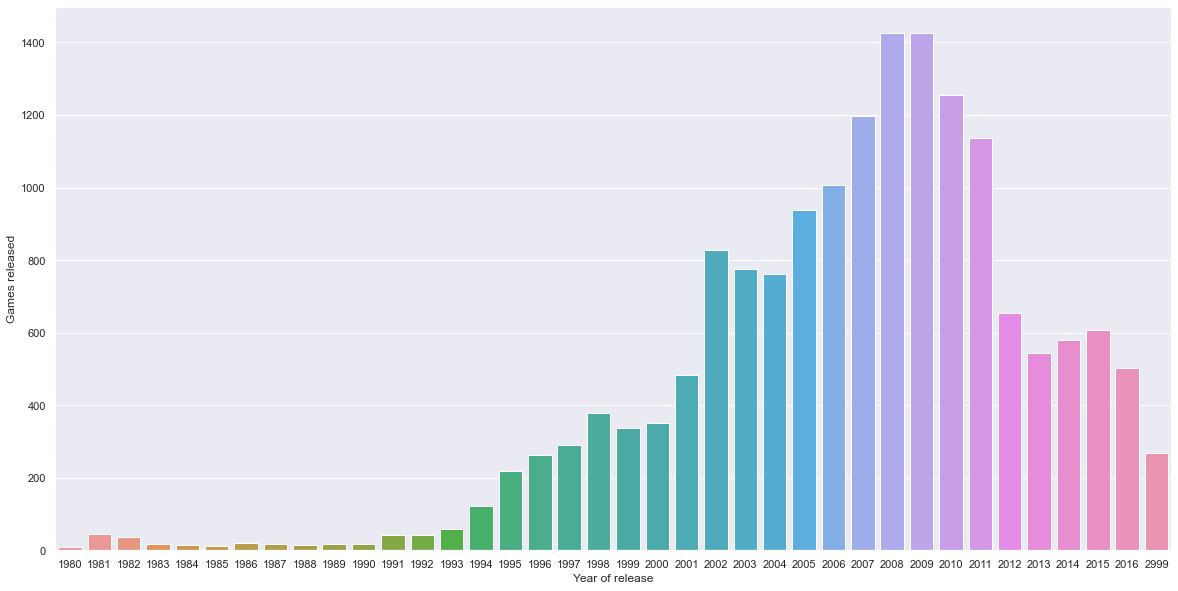

### 3.2 ¿Cómo varian las ventas de una plataforma a otra?  

*Comparativa año con año*

In [33]:
platform_group = df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
print(len(platform_group))
platform_group.reset_index(drop=True,inplace=True)
platform_group

31


,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [34]:
#las 5 plataformas con mayores ventas históricas
platform_top=platform_group.head(10)
platform_top=platform_top[~platform_top['platform'].isin(['PSP','PS4','GBA'])]
platform_top.reset_index(drop=True,inplace=True)
platform_top

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,PC,259.52


In [35]:
platform_top_list=platform_top['platform'].to_list()
print(platform_top_list)
test1 = df[df['platform'].isin(platform_top_list)]
test1.groupby(['platform','year_of_release'])['year_of_release'].sum()

#df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PC']


platform  year_of_release
DS        1985                 1985
          2004                46092
          2005               236590
          2006               403206
          2007               754632
                              ...  
X360      2013               150975
          2014               126882
          2015                70525
          2016                26208
          2999                89970
Name: year_of_release, Length: 100, dtype: int32

In [36]:
df[df['platform']=='DS'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,105.0,11,UN,0.02
10940,Puyo Pop Fever (JP sales),DS,2004,Puzzle,0.00,0.00,0.09,0.00,105.0,11,UN,0.09
14161,Puyo Pop Fever(us sales),DS,2004,Puzzle,0.03,0.00,0.00,0.00,105.0,11,UN,0.03
9148,Mr. Driller: Drill Spirits,DS,2004,Puzzle,0.08,0.00,0.05,0.01,70.0,8.9,E,0.14
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,105.0,11,UN,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
10764,Luminous Arc 2 (JP sales),DS,2999,Role-Playing,0.00,0.00,0.10,0.00,105.0,11,UN,0.10
3081,LEGO Harry Potter: Years 5-7,DS,2999,Action,0.34,0.25,0.00,0.07,69.0,tbd,E10+,0.66
14126,Housekeeping,DS,2999,Action,0.00,0.00,0.04,0.00,105.0,11,UN,0.04
11790,Mega Man Battle Network: Operation Shooting Star,DS,2999,Role-Playing,0.00,0.00,0.07,0.00,105.0,11,UN,0.07


### 3.2.1 Observamos que el videojuego 'Strongest Tokyo University Shogi DS	' tiene inconsistencias, según la base de datos fue lanzado para la plataforma 'DS' en 1985, sin embargo corroborando en datos online observamos que el juego fue lanzado en Mayo de 2007, por lo tanto corregiremos el dato y continuaremos con el análisis

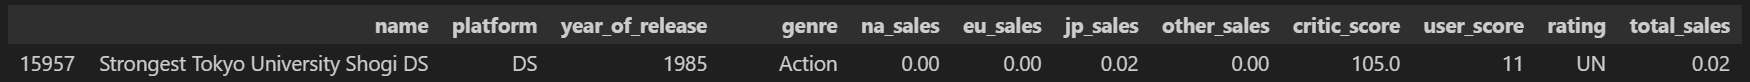

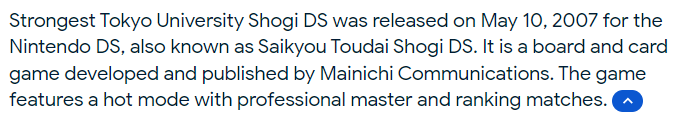

In [37]:
#df[df['name']=='Strongest Tokyo University Shogi DS']['year_of_release'] = 2007
df.loc[15957,'year_of_release'] = 2007
df[df['name']=='Strongest Tokyo University Shogi DS']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2007,Action,0.0,0.0,0.02,0.0,105.0,11,UN,0.02


### 3.2.3 Regresamos al análisis de las ventas por plataforma

In [38]:
print(platform_top_list)
test1 = df[df['platform'].isin(platform_top_list)]
t1 = test1.groupby(['platform','year_of_release'])['year_of_release'].sum()
t1

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PC']


platform  year_of_release
DS        2004                46092
          2005               236590
          2006               403206
          2007               756639
          2008               987936
                              ...  
X360      2013               150975
          2014               126882
          2015                70525
          2016                26208
          2999                89970
Name: year_of_release, Length: 99, dtype: int32

In [39]:
t1['DS']

year_of_release
2004     46092
2005    236590
2006    403206
2007    756639
2008    987936
2009    809627
2010    649230
2011    307683
2012     46276
2013     16104
2999     89970
Name: year_of_release, dtype: int32

In [40]:
t2= pd.DataFrame(t1)
t2.rename(columns={'year_of_release':'total_sales'},inplace=True)
t2.reset_index(inplace=True)
t2.head(10)
#t2.set_index('year_of_release')


,platform,year_of_release,total_sales
0,DS,2004,46092
1,DS,2005,236590
2,DS,2006,403206
3,DS,2007,756639
4,DS,2008,987936
5,DS,2009,809627
6,DS,2010,649230
7,DS,2011,307683
8,DS,2012,46276
9,DS,2013,16104


In [41]:
t2[t2['platform']=='DS'].head()

,platform,year_of_release,total_sales
0,DS,2004,46092
1,DS,2005,236590
2,DS,2006,403206
3,DS,2007,756639
4,DS,2008,987936


Text(0.5, 0, 'Year of release')

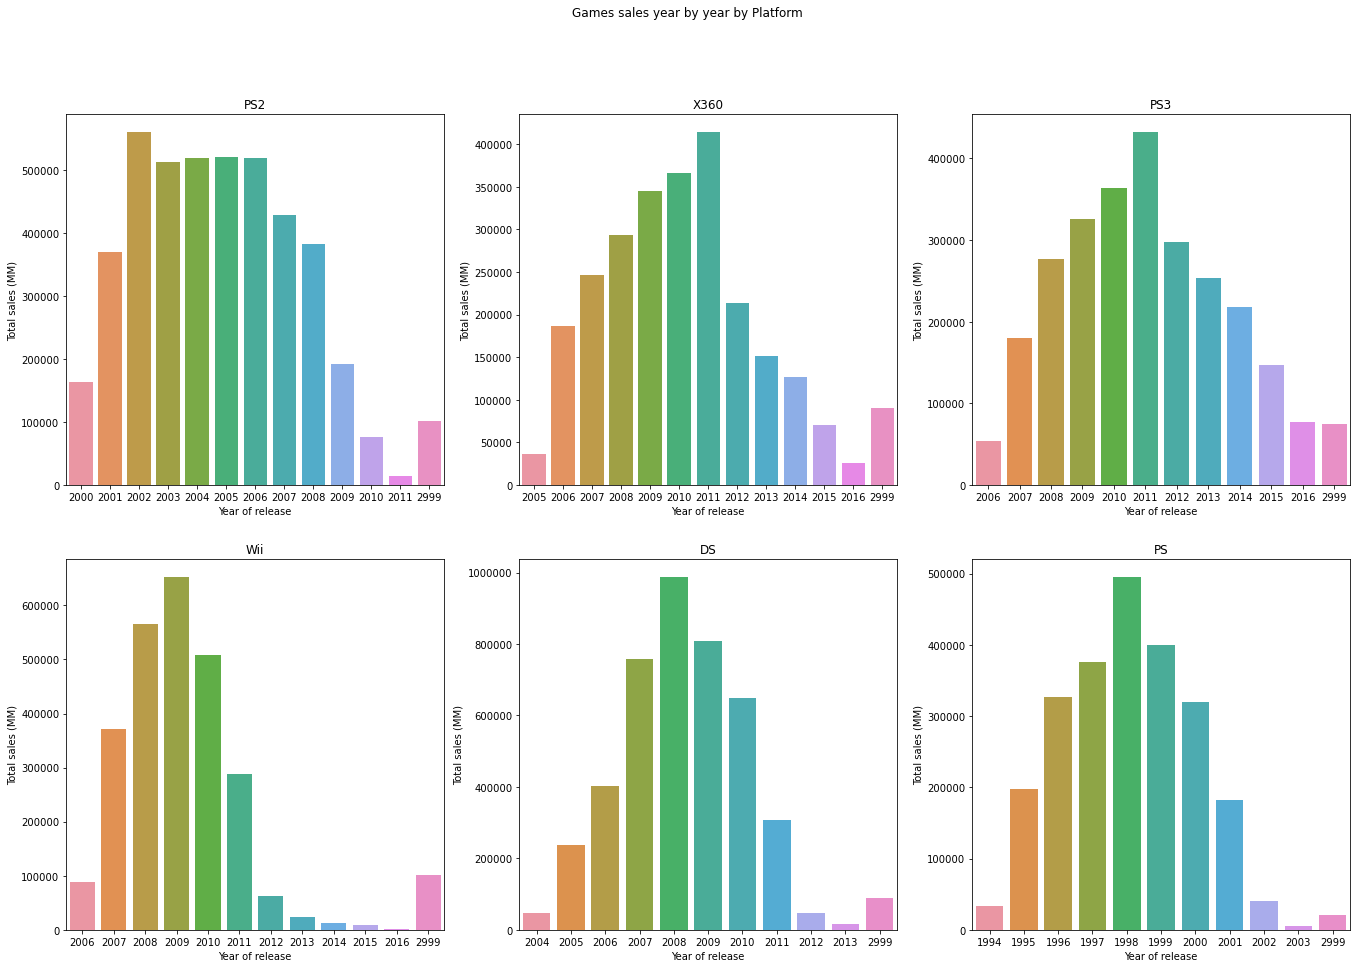

In [42]:
#sns.displot(kind='hist',data=t2, x='year_of_release',y='total_sales')
#fig ,axs = plt.subplots(3,2, figsize=(10,10))
#['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

fig = plt.figure(figsize=(23,15))
fig.suptitle('Games sales year by year by Platform')
fig.set_facecolor("white")


ax1=fig.add_subplot(231)
sns.barplot(data=t2[t2['platform']=='PS2'], ax=ax1, x='year_of_release',y='total_sales')
ax1.title.set_text('PS2')
ax1.set_ylabel('Total sales (MM)')
ax1.set_xlabel('Year of release')


ax2=fig.add_subplot(232)
sns.barplot(data=t2[t2['platform']=='X360'], ax=ax2, x='year_of_release',y='total_sales')
ax2.title.set_text('X360')
ax2.set_ylabel('Total sales (MM)')
ax2.set_xlabel('Year of release')


ax3=fig.add_subplot(233)
sns.barplot(data=t2[t2['platform']=='PS3'], ax=ax3, x='year_of_release',y='total_sales')
ax3.title.set_text('PS3')
ax3.set_ylabel('Total sales (MM)')
ax3.set_xlabel('Year of release')


ax4=fig.add_subplot(234)
sns.barplot(data=t2[t2['platform']=='Wii'], ax=ax4, x='year_of_release',y='total_sales')
ax4.title.set_text('Wii')
ax4.set_ylabel('Total sales (MM)')
ax4.set_xlabel('Year of release')

ax5=fig.add_subplot(235)
sns.barplot(data=t2[t2['platform']=='DS'], ax=ax5, x='year_of_release',y='total_sales')
ax5.title.set_text('DS')
plt.ticklabel_format(style='plain', axis='y')

ax5.set_ylabel('Total sales (MM)')
ax5.set_xlabel('Year of release')

ax6=fig.add_subplot(236)
sns.barplot(data=t2[t2['platform']=='PS'], ax=ax6, x='year_of_release',y='total_sales')
ax6.title.set_text('PS')
plt.ticklabel_format(style='plain', axis='y')

ax6.set_ylabel('Total sales (MM)')
ax6.set_xlabel('Year of release')

#sns.barplot(data=t2[t2['platform']=='DS'], ax=axs[0,1], x='year_of_release',y='total_sales')
#axs[0,1].plot(t2)

añadimos la plataforma PC debido a que es la plataforma que más años ha permanecido en el mercado

Text(0.5, 1.0, 'PC sales year by year')

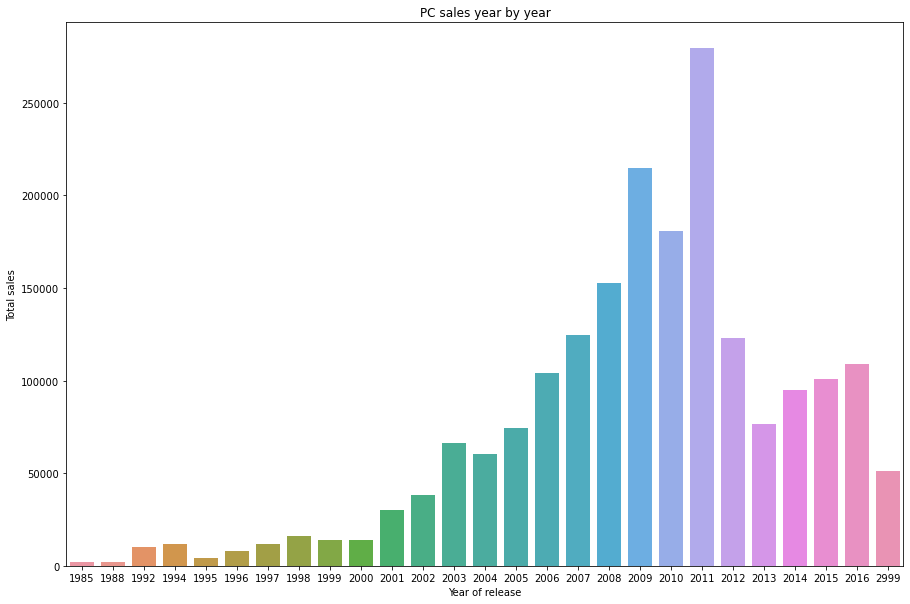

In [43]:
plt.figure(figsize=(15,10))
fig.set_facecolor("white")
sns.barplot(x='year_of_release',y='total_sales',data=t2[t2['platform']=='PC'])
plt.xlabel('Year of release')
plt.ylabel('Total sales')
plt.title('PC sales year by year')

Investigación previa de las plataformas:
* El Sony PS2 fue lanzado en Marzo del 2000
* El Nintendo DS fue lanzado en Noviembre de 2004
* El Xbox 360 fue lanzado en Noviembre de 2005
* El Nintendo Wii fue lanzado en Noviembre de 2006
* El Sony PS3 fue lanzado en Noviembre de 2006
* El Sony PS fue lanzado en Septiembre de 1995


Conforme a la investigación previa de las plataformas aunado a el análisis realizado podemos observar que:
* La plataforma con mayor cantidad de ventas históricas fue el Nintendo DS con cerca de 988 mil millones de dólares en el 2008
* La segunda plataforma con mayor cantidad de ventas históricas fue el Nintendo Wii con cerca de 653 mil millones de dólares en 2009

Considerando los años de lanzamiento de las plataformas (previamente descritos) podemos concluir que:
* El primer año a partir del lanzamiento de las plataformas, no suelen existir demasiadas ventas, esto puede deberse a;
    * La cantidad de juegos que existan desarrollados al momento sean pocos
    * Los usuarios van ganando confianza a través de las reseñas comunitarias (usuarios y críticos)
    * El precio de las plataformas recién lanzadas suele ser elevado
    * Errores de desarrollo que se irán parchando conforme avance el tiempo
* El auge de las plataformas suele ser incremental y durar aproximadamente entre 5 y 6 años para después comenzar a decaer, esto puede deberse a:
    * La cantidad de juegos desarrollados va en aumento
    * Reducción de errores de desarrollo (Parches)
    * Estabilización de los precios de la plataforma y sus títulos
    * Sólida confianza de los usuarios construida
* El ocaso de las plataformas suele verse entre los 6 y 9 años después de su lanzamiento, exceptuando al nintendo Wii que se desvaneció 5 años después de su lanzamiento

* La plataforma que tuvo estabilidad en ventas por más años fue el PS2

* La plataforma con mayor cantidad de ventas en el año de lanzamiento fue el PS2 con cerca de 170,000 millones de dólares
* La plataforma con menor cantidad de ventas en el año de lanzamiento fue el PS con cerca de 33,000 millones de dólares

* Las plataformas con un mejor ingreso al mercado (conforme a su comportamiento de ventas a partir del año 2 ) en orden fueron:
    * PS2
    * Wii
    * DS
    * X360
    * PS3
    * PS
    * PC

**Notas del investigador:**

*La plataforma PC fue añadida en este grupo de top plataformas debido a que ha permanecido en el mercado por mayor cantidad de años, si bien su comportamiento no responde al mismo ciclo de vida de las demás plataformas, sus ventas han sido considerables*

*El año 2999 fue etiquetado solo como referencia de videojuegos que no cuentan con información sobre su año de lanzamiento sin embargo pueden representar una cantidad considerable de ventas globales*



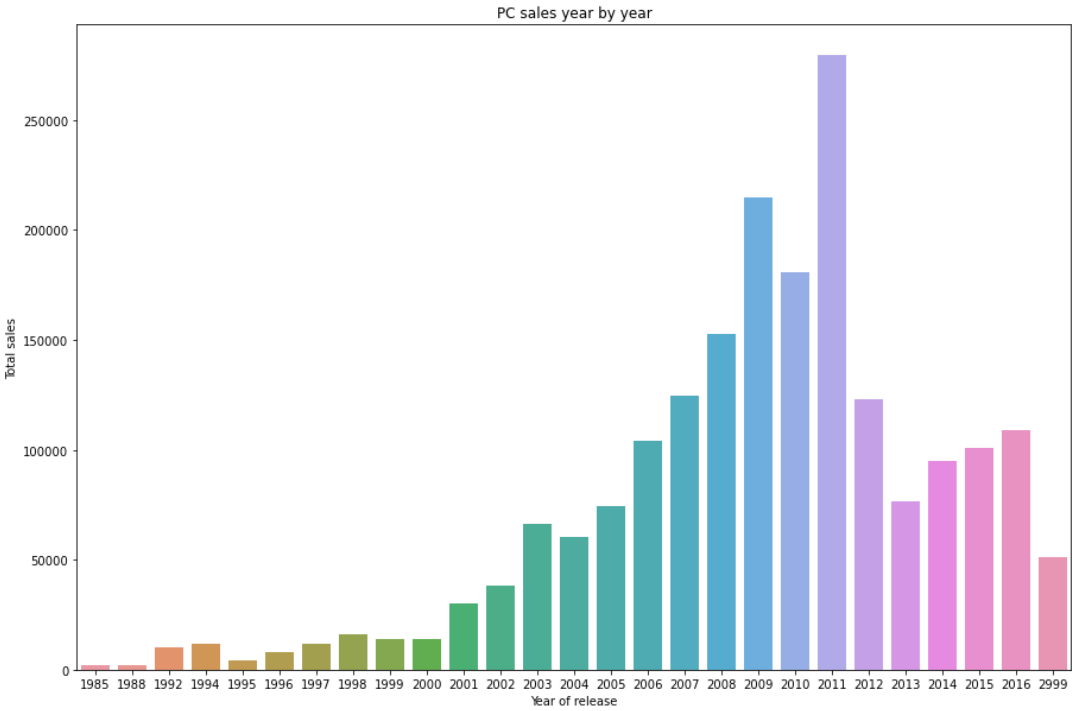

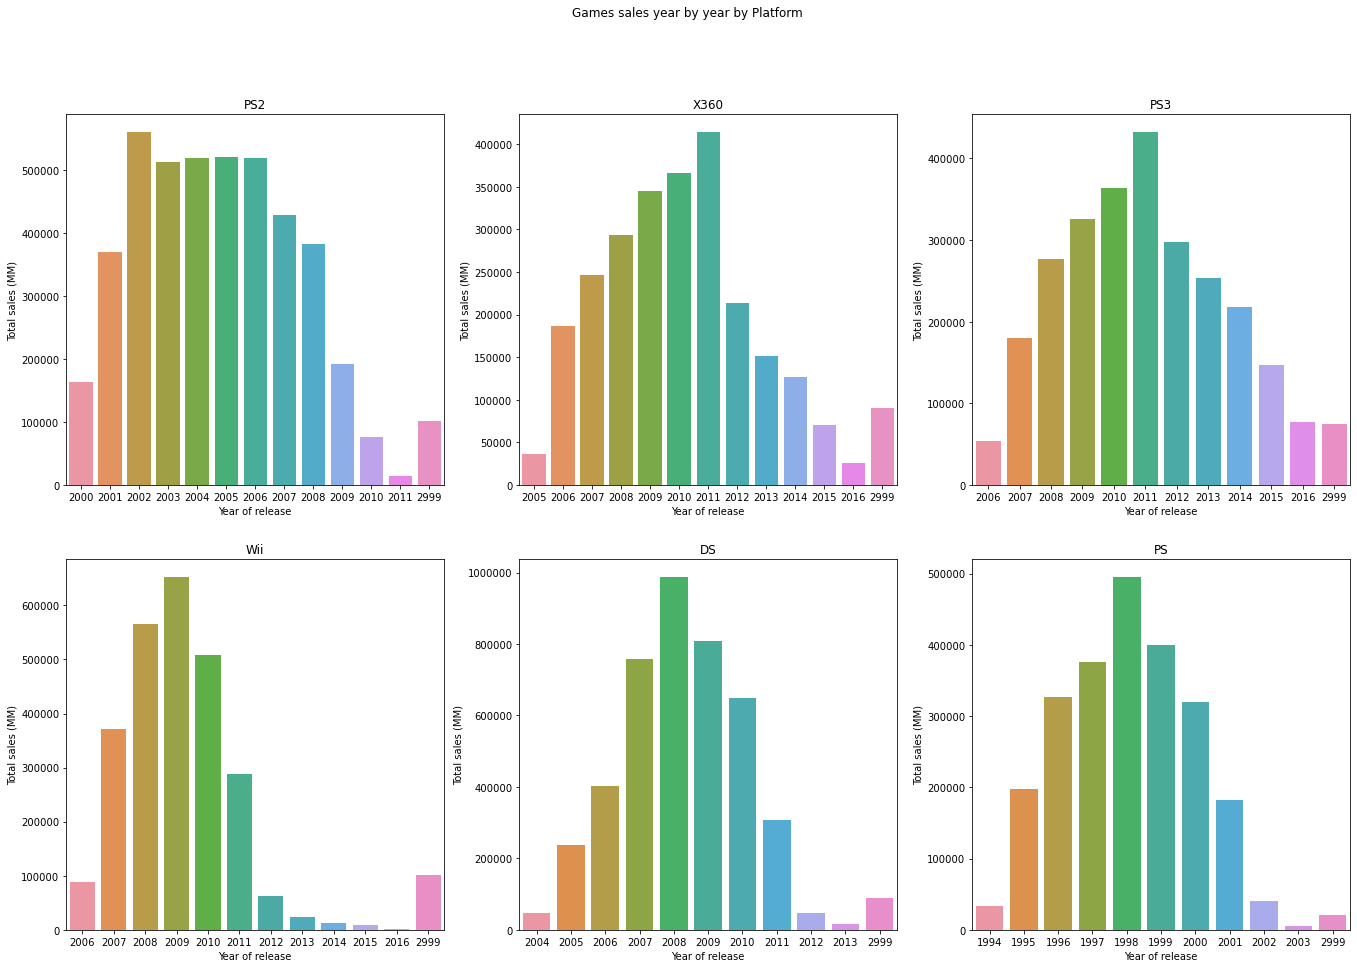

**Plataformas que solían ser populares y ahora no tienen ventas**

¿Cuánto tardan generalmente las nuevas en aparecer y las antiguas en desaparecer?

**Con base a los datos anteriores podemos verificar que el ciclo de vida de las consolas es de 9 años, por lo tanto vamos a trabajar con los datos de los últimos 9 años para poder determinar nuestro modelo para el 2017**


### 3.3 Analizando ¿Qué plataformas son lideres en ventas? ¿Cuáles crecen y cuáles se reducen?

eligiendo plataformas potencialmente rentables

*Para esta tarea se localizaron las top 6 plataformas por década basado en sus ventas totales y añadimos la plataforma PC debido a que es la plataforma que más años ha permanecido en el mercado*

In [44]:
#p_list=t2.platform.unique()
#p_list

In [45]:
#Filtrando por videojuegos lanzados después del 2006
df2 =df[df['year_of_release']>2006]
df2=df2[df2['year_of_release']!=2999]
df2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [46]:
#Filtrando las plataformas más vendidas en los últimos 9 años
#guardando en una lista
top_10_plat =df2.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_10_plat=top_10_plat.head(10)

top_10_plat_df=pd.DataFrame(top_10_plat).reset_index()
top_10_plat_list = top_10_plat_df['platform'].unique()
top_10_plat_list


array(['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS', 'PSP', 'PS2', 'PC',
       'XOne'], dtype=object)

In [47]:
#Filtrando el df con la lista de top 10 plataformas más vendidas en los últimos 9 años
top_10= df2[df2['platform'].isin(top_10_plat_list)]
top_10.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [48]:
#creando una tabla pivote para poder gráficar la sumatoria de ventas por plataforma
pivot_df= top_10.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
pivot_df
#pivot_df.T


platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,X360,XOne
year_of_release,,,,,,,,,,
2007,NaN,146.96,9.28,75.99,73.19,NaN,46.93,152.77,95.41,NaN
2008,NaN,145.31,12.42,53.90,118.52,NaN,34.55,171.32,135.26,NaN
2009,NaN,119.54,16.91,26.40,130.93,NaN,37.78,206.97,120.29,NaN
2010,NaN,85.02,24.28,5.64,142.17,NaN,35.04,127.95,170.03,NaN
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,59.65,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,21.71,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,8.59,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,3.75,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,1.14,11.96,60.14


Text(0, 0.5, 'Sales in MM')

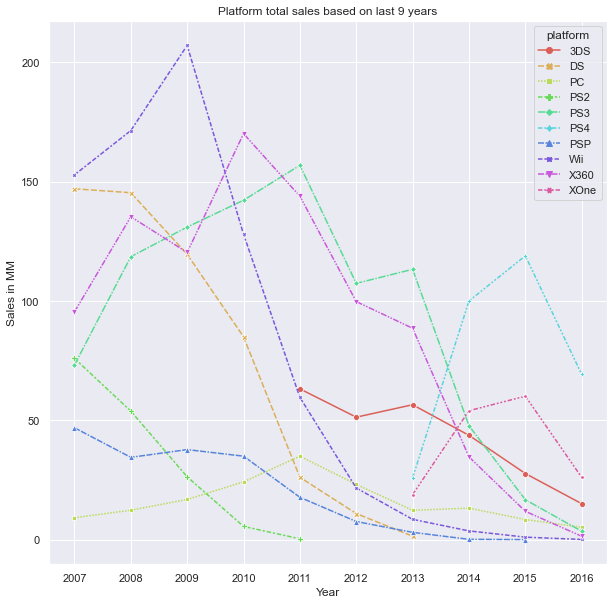

In [49]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax=sns.lineplot(data=pivot_df, markers=True,palette='hls')
ax.set_xticks(pivot_df.index)
ax.set_title('Platform total sales based on last 9 years')
ax.set_xlabel('Year')
ax.set_ylabel('Sales in MM')


Podemos observar que:
* La plataforma lider en ventas en el 2016 es el PS4 con un aproximado de 70 Millones de dólares en ventas seguida por el XONE con un aproximado de 35 millones de dólares en ventas
* la plataforma PC si bien no lidera las ventas, mantiene un flujo estable a través de los años, oscilando entre los 10 y 35 millones de dólares en ventas
Dentro de las plataformas que en los últimos 9 años han perdido drásticamente su fuerza podemos observar:
* Nintendo Wii pasó de superar los 200 millones de dólares a practicamente menos de 1 millon de dólares en ventas
* X360 pasó de tener cerca de 160 millones de dólares a 1 millon de dólares en ventas

En los últimos 9 años observamos que  de las 10 plataformas principales que existían, solamente 3 (PS4, XONE, 3DS y PC) siguen con ventas activas, sin embargo de estas últimas ya se observa el ocaso del 3DS

Para las 3 plataformas restantes que siguen activas (PS4, XONE y PC) es posibloe que los datos del 2016 no estén del todo completos y por eso observemos que sus ventas hayan caído drásticamente, no tendríamos información suficiente para determinar si la causa de la caída en ventas es la falta de información o el ocaso del ciclo de vida de la plataforma.

con la información previa podemos entonces determinar que **las plataformas líderes en ventas son PS4, XONE y PC**

## 3.4 Ventas globales de todos los videojuegos por plataforma
Creando un diagrama de caja para representar las ventas globales de todos los videojuegos por plataforma

**¿Son significativas las diferencias en ventas?**

**¿Qué sucede con las ventas promedio en varias plataformas?**

In [50]:
plat_global_sales =df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
#ps2 = dfin[dfin['platform']=='PS2']
#ps2.drop(columns='year_of_release', inplace=True)
plat_global_sales.drop(columns='year_of_release', inplace=True)
plat_global_sales.head()
#plat_global_sales.boxplot(hue='platform')
#ps2.boxplot()

,platform,total_sales
142,PS2,211.81
212,Wii,206.97
140,PS2,205.38
141,PS2,184.31
211,Wii,171.32


Text(0.5, 1.0, 'Yearly global sales by platform')

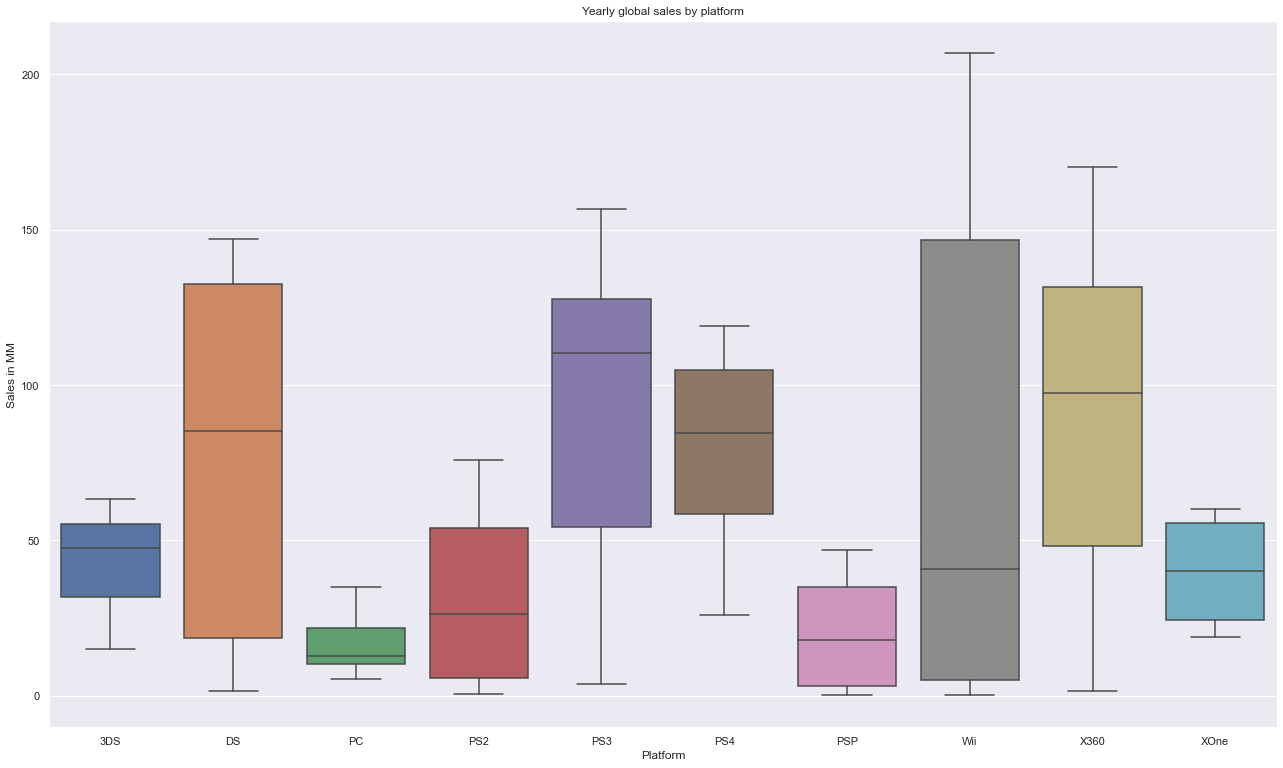

In [51]:
plt.figure(figsize=[22,13])
sns.boxplot(data=pivot_df)
plt.ylabel('Sales in MM')
plt.xlabel('Platform')
plt.title('Yearly global sales by platform')


In [52]:
pivot_df

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,X360,XOne
year_of_release,,,,,,,,,,
2007,NaN,146.96,9.28,75.99,73.19,NaN,46.93,152.77,95.41,NaN
2008,NaN,145.31,12.42,53.90,118.52,NaN,34.55,171.32,135.26,NaN
2009,NaN,119.54,16.91,26.40,130.93,NaN,37.78,206.97,120.29,NaN
2010,NaN,85.02,24.28,5.64,142.17,NaN,35.04,127.95,170.03,NaN
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,59.65,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,21.71,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,8.59,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,3.75,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,1.14,11.96,60.14


In [53]:
pivot_df.describe()

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,X360,XOne
count,6.000000,7.000000,10.000000,5.000000,10.000000,4.000000,9.000000,10.000000,10.000000,4.000000
mean,42.968333,76.508571,16.057000,32.476000,91.038000,78.535000,20.367778,75.403000,90.137000,39.830000
std,18.278261,63.330487,9.028435,32.152797,53.112204,40.567917,18.385661,81.075756,57.123728,20.313977
min,15.140000,1.540000,5.250000,0.450000,3.600000,25.990000,0.120000,0.180000,1.520000,18.960000
25%,31.775000,18.595000,10.055000,5.640000,54.117500,58.435000,3.140000,4.960000,48.200000,24.352500
50%,47.560000,85.020000,12.850000,26.400000,110.305000,84.625000,17.820000,40.680000,97.575000,40.110000
75%,55.267500,132.425000,21.642500,53.900000,127.827500,104.725000,35.040000,146.565000,131.517500,55.587500
max,63.200000,146.960000,35.030000,75.990000,156.780000,118.900000,46.930000,206.970000,170.030000,60.140000


Analizando las 10 principales plataformas de los últimos 9 años, podemos observar:
* Las plataforma con mayor ingreso promedio fue el PS3  con 91 millones de dólares e inmediatamente debajo se observa el X360 con 90 millones de dólares 
* La plataformas que que lideraron los máximos de ventas históricos fueron el PS3 , Nintendo Wii y el X360
* La plataforma con el mínimo más bajo presentado fue el PS2 con 0.45 millones de dólares en el 2011, sin embargo esto se puede atribuir a que fue el último año que presentó ventas en su ciclo de vida

Conforme a los años que han permanecido en el mercado, al igual que sus promedios de venta, podemos determinar que las plataformas más rentables han sido:
* PS3 presente en los últimos 9 años (y el año en curso) con ventas promedio de 91 millones de dólares
* X360 presente en los últimos 9 años (y el año en curso) con ventas promedio de 90 millones de dólares
* Nintendo Wii presente en los últimos 9 años (y el año en curso) con ventas promedio de 75 millones de dólares

Las plataformas que se encuentran en crecimiento actualmente son:
* PS4 promediando 78.5 millones de dólares en ventas en los últimos 3 años (y el año en curso)
* XONE promediando 39.83 millones de dólares en ventas en los últimos 3 años (y el año en curso)
    * Si bien esta plataforma no es la más destacable actualmente, es una de las plataformas que está presentando crecimiento
    * Cabe mencionar que este 2016 es su 3er año desde su lanzamiento (noviembre 2013) por lo que si bien está en auge, es muy posible que su desempeño no llegue a ser tan relevante como el del PS4

*Se tomaron en cuenta dos años consecutivos de crecimiento para determinar que es una plataforma en crecimiento*


Las plataformas que desaparecieron en los últimos años fueron:
* Nintendo DS
* Sony PSP
* Sony PS2
* Nintendo Wii (si bien no ha desaparecido del todo, sus ventas no superan 0.1 millones de dólares en el año en curso)

Bajo todas estas conclusiones presentadas, será interesante prestar atención a las buenas estrategias que han tomado las plataformas; PS3, X360, PS4 y XONE. De igual manera será útil prestar atención en que sucedió para que plataformas como Nintendo DS, Sony PSP, Nintendo Wii y Sony PS2 perdieran popularidad.

## 3.5 ¿Cómo afectan las reseñas de usuarios y profesionales a las ventas de una plataforma popular?

Creando un gráfico de dispersión y calculando la correlación entre las reseñas y las ventas

*Escogimos el PS3 debido a que fue la plataforma con mejor desempeño en los últimos años y porque observamos un ciclo de vida completo, desde su auge en el 2do año (2007) hasta su declive en el año actual (2016)*

In [54]:
#Creando un df para la plataforma escogida (PS3)
ps3 =top_10[top_10['platform']=='PS3']
ps3.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9968,Armored Core: Verdict Day,PS3,2013,Simulation,0.00,0.00,0.12,0.00,66.0,7.4,T,0.12
2780,NBA 2K16,PS3,2015,Sports,0.45,0.12,0.03,0.13,105.0,4.6,E,0.73
9465,Pro Evolution Soccer 2017,PS3,2016,Sports,0.01,0.05,0.06,0.01,105.0,7.2,E,0.13
4685,Terraria,PS3,2013,Action,0.07,0.20,0.09,0.05,81.0,7.9,T,0.41
5791,SingStar Take That,PS3,2009,Misc,0.00,0.28,0.00,0.03,105.0,11,UN,0.31


In [55]:
#Eliminando las filas de user_score donde el valor sea "tbd" To Be Determined y convirtiendo el tipo de dato de la columna a float
ps3= ps3[ps3['user_score']!='tbd']
ps3['user_score'] = ps3['user_score'].astype(float)
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16639,WSC REAL 09: World Snooker Championship,PS3,2009,Sports,0.00,0.01,0.00,0.00,105.0,11.0,UN,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,105.0,11.0,UN,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,105.0,11.0,UN,0.00
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,105.0,11.0,UN,0.01


In [56]:
#print(p)
#print(ps3['user_score'].corr(ps3['total_sales']))
ps3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.148582,-0.068777,0.048938,-0.082409,0.329567,0.147346,-0.100035
na_sales,-0.148582,1.000000,0.810475,0.338372,0.871570,0.008097,-0.150545,0.935907
eu_sales,-0.068777,0.810475,1.000000,0.367953,0.977297,0.040078,-0.109357,0.957697
jp_sales,0.048938,0.338372,0.367953,1.000000,0.373646,0.054894,0.054058,0.452687
other_sales,-0.082409,0.871570,0.977297,0.373646,1.000000,0.033134,-0.111942,0.977793
critic_score,0.329567,0.008097,0.040078,0.054894,0.033134,1.000000,0.731531,0.031009
user_score,0.147346,-0.150545,-0.109357,0.054058,-0.111942,0.731531,1.000000,-0.122468
total_sales,-0.100035,0.935907,0.957697,0.452687,0.977793,0.031009,-0.122468,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap for PS3 sales data'}>

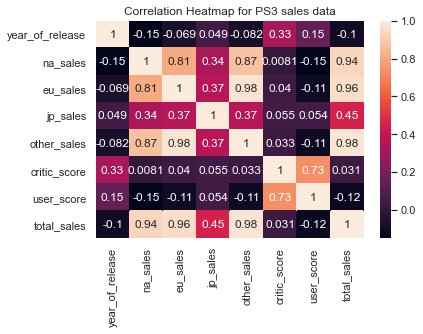

In [57]:
plt.title('Correlation Heatmap for PS3 sales data')
sns.heatmap(ps3.corr(),annot=True)


In [58]:
print(f" El índice de correlación entre las críticas de usuario y las ventas totales es : {ps3['user_score'].corr(ps3['total_sales'])} ")
print()
print(f" El índice de correlación entre las críticas de usuario y las ventas totales es : {ps3['critic_score'].corr(ps3['total_sales'])} ")

 El índice de correlación entre las críticas de usuario y las ventas totales es : -0.12246825644534994 

 El índice de correlación entre las críticas de usuario y las ventas totales es : 0.03100939390595895 


 El índice de correlación entre las críticas de usuario y las ventas totales es : -0.12246825644534994 


Text(0, 0.5, 'Total sales in MM')

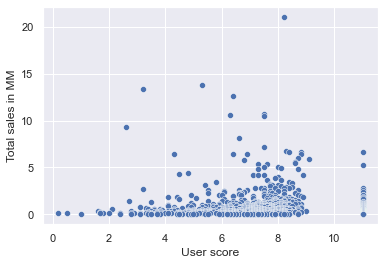

In [59]:
#Creando un scatterplots para visualizar mejor los datos del PS3
print(f" El índice de correlación entre las críticas de usuario y las ventas totales es : {ps3['user_score'].corr(ps3['total_sales'])} ")
sns.scatterplot(data=ps3, x='user_score', y='total_sales')
plt.xlabel('User score')
plt.ylabel('Total sales in MM')

 El índice de correlación entre las críticas de usuario y las ventas totales es : 0.03100939390595895 


Text(0, 0.5, 'Total sales in MM')

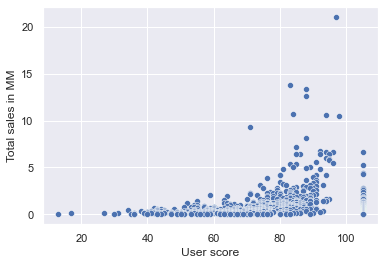

In [60]:
print(f" El índice de correlación entre las críticas de usuario y las ventas totales es : {ps3['critic_score'].corr(ps3['total_sales'])} ")
sns.scatterplot(data=ps3, x='critic_score', y='total_sales')
plt.xlabel('User score')
plt.ylabel('Total sales in MM')

Podemos observar que las críticas de usuario y las ventas totales tienen una correlación negativa de -0.122 (son inversamente proporcionales), esto indica que mientras las criticas de usuario aumentan, las ventas disminuyen **sin embargo** el coeficiente de correlación está ubicado entre *0 <--> -0.2* esto nos indica que la correlación es **muy baja**.

Podemos observar que las críticas de de los profesionales y las ventas totales tienen una correlación positiva de 0.03 (son directamente proporcionales), esto indica que mientras las criticas de los profesionales aumentan, las ventas aumentan **sin embargo** el coeficiente de correlación está ubicado entre *0 <--> 0.2* esto nos indica que la correlación es **muy baja**.

### 3.5.1 Comparando los mismos juegos en otras plataformas

In [61]:
#top_10
#ps3
#Creando un dataframe que incluya los juegos del PS3 en otras plataformas (top 10 de los últimos 9 años)

comp1 = top_10[top_10['name'].isin(ps3['name'])]
comp =comp1[comp1['platform']!='PS3']
comp.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,105.0,11,UN,14.63
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


In [62]:
#  print('{: <30.2}{: <30.2}'.format(relevantgames[relevantgames['platform']==name_platform]['total_sales']\
#                                    .corr(relevantgames[relevantgames['platform']==name_platform]['critic_score'])\
                                   
#                                    , relevantgames[relevantgames['platform']==name_platform]['total_sales']\
#                                    .corr(relevantgames[relevantgames['platform']==name_platform]['user_score'])))
#     print('_____________________________________________________________')
#     print()

In [63]:
top_10['platform'].values

array(['Wii', 'Wii', 'Wii', ..., 'PC', 'PS2', 'PS3'], dtype=object)

In [64]:
top_10.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [67]:
#top_10_pivot =
#pivot_df= top_10.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')

teste= top_10.pivot_table(index='name',columns='platform',values='total_sales')
teste
#teste['3DS']


platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,X360,XOne
name,,,,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
thinkSMART FAMILY!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN
thinkSMART: Chess for Kids,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uDraw Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.42,NaN,NaN


In [99]:
#Iterando las plataformas para obtener la correlación de las 3 variables en cada plataforma
# for plat in comp:
#     print(comp[['platform','total_sales']])

##try df.attrs['name'] = "My name"   # Can be retrieved later

c=0
top_plat_comp_list = comp['platform'].unique()

print(top_plat_comp_list)
df_x360 = pd.DataFrame()
df_ps4 = pd.DataFrame()
df_wii = pd.DataFrame()
df_pc = pd.DataFrame()
df_xone = pd.DataFrame()
df_ps2 = pd.DataFrame()
df_ds = pd.DataFrame()
df_psp = pd.DataFrame()
df_3ds = pd.DataFrame()
dframes=[df_x360,df_ps4,df_wii,df_pc,df_xone, df_ps2, df_ds, df_psp, df_3ds]

# for dataframe in dframes:
#     print(dataframe.columns)

for platform in top_plat_comp_list:
    print(platform)


# for platform in top_plat_comp_list:
#     for dfs in dframes:
#         print(dfs)
#         #dfs=top_10[top_10['platform']==platform]

# for dfs in dframes:
#     for platform in top_plat_comp_list:
#         print(dfs)
#         #dfs=top_10[top_10['platform']==platform]

# for platform in top_plat_comp_list:
#     #c+=1
#     #variable = "df_"+ str(platform)
#     #= pd.DataFrame(top_10[top_10['platform']==platform])
#     #print(variable)
#     #=top_10[top_10['platform']==platform]
#     #dframes=top_10[top_10['platform']==platform]
#     pass


#dfs

['X360' 'PS4' 'Wii' 'PC' 'XOne' 'PS2' 'DS' 'PSP' '3DS']
name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating
total_sales


In [59]:
# plt.figure(figsize=[22,13])
# sns.boxplot(data=pivot_global_sales)

In [60]:
#df.pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum')

top_7 = df[df['year_of_release']>2006]
#top_7 = top_7[~top_7['year_of_release']==2999]

#top_7

top_7= top_7[top_7['year_of_release']!=2999]
#top_7 = top_7[top_7['platform'].isin(p_list)]

top_7
# top_7['platform'].unique()



# pivot_df= top_7.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc='sum')
# pivot_df.T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,105.0,11,UN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,105.0,11,UN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,105.0,11,UN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,105.0,11,UN,0.01


In [61]:
# plt.figure(figsize=(10,10))
# sns.set_theme(style="darkgrid")
# ax=sns.lineplot(data=pivot_df)
# ax.set_xticks(pivot_df.index)
# ax.set_title('Platform total sales based on last 9 years')
# ax.set_xlabel('Year')
# ax.set_ylabel('Sales in MM')


In [62]:
#plt.plot(kind='lineplot',data=t2)
#t2_unmelted= 
#t2.T
#t2
t3=t2.pivot(index='platform',columns=['total_sales'])
#t3
t3.reset_index(inplace=True)
t3.T
#sns.lineplot(data=t3, x='platform')

0       1    2    3    4       5     6
                total_sales                                             
platform                         DS      PC   PS  PS2  PS3     Wii  X360
year_of_release 1985            NaN  1985.0  NaN  NaN  NaN     NaN   NaN
                1988            NaN  1988.0  NaN  NaN  NaN     NaN   NaN
                2016            NaN     NaN  NaN  NaN  NaN  2016.0   NaN
                3990            NaN  1995.0  NaN  NaN  NaN     NaN   NaN
...                             ...     ...  ...  ...  ...     ...   ...
                649230       2010.0     NaN  NaN  NaN  NaN     NaN   NaN
                652925          NaN     NaN  NaN  NaN  NaN  2009.0   NaN
                756639       2007.0     NaN  NaN  NaN  NaN     NaN   NaN
                809627       2009.0     NaN  NaN  NaN  NaN     NaN   NaN
                987936       2008.0     NaN  NaN  NaN  NaN     NaN   NaN

[98 rows x 7 columns]

# 5 Zona de pruebas

In [63]:
#df.groupby('platform')['year_of_release'].count()
platform_list= df['platform'].unique()

plat_test=df[df['platform'].isin(platform_list)]
plat_test_serie=plat_test.groupby(['platform','year_of_release'])['year_of_release'].sum()

plat_test_serie
#type(plat_test)
plat_test_df= pd.DataFrame(plat_test_serie)
plat_test_df.rename(columns={'year_of_release':'total_sales'},inplace=True)
plat_test_df.reset_index(inplace=True)
#plat_test_df= plat_test_df[plat_test_df['year_of_release']<2000]
plat_test_df


,platform,year_of_release,total_sales
0,2600,1980,17820
1,2600,1981,91126
2,2600,1982,71352
3,2600,1983,21813
4,2600,1984,1984
...,...,...,...
248,XB,2999,62979
249,XOne,2013,38247
250,XOne,2014,122854
251,XOne,2015,161200


In [1]:
platforms_to_drop=['DS','PS2', 'PS3','Wii','X360']
plat_test_df=plat_test_df[~plat_test_df['platform'].isin(platforms_to_drop)]
plat_test_df.sort_values(by='year_of_release',inplace=True)

NameError: name 'plat_test_df' is not defined

In [65]:
plat_test_df

,platform,year_of_release,total_sales
0,2600,1980,17820
1,2600,1981,91126
2,2600,1982,71352
3,2600,1983,21813
83,NES,1983,11898
...,...,...,...
51,GB,2999,2999
137,PS,2999,20993
248,XB,2999,62979
10,2600,2999,50983


Analizando el resto de las plataformas observamos que:
* A diferencia de las plataformas con mayor cantidad de ventas, las plataformas lanzadas antes del 2000 solían tener un auge de 3 años y un ocaso de 2 a 3 años, dando un ciclo de vida de aproximadamente 5 a 6 años
* 